In [9]:
from google.colab import drive
import plotly.express as px
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [11]:
FILE_PATH="/content/drive/MyDrive/DIC_Dataset/SpotifyFeatures.csv"

In [12]:
spotifyData=pd.read_csv(FILE_PATH)
originalData=pd.read_csv(FILE_PATH)
print(originalData.shape)
originalData.head()

(232725, 18)


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [13]:
#Popularity would be predicted using other features.
PRED_COLUMN="popularity"

# Data Cleaning and Processing

##1. Checking if any attributes contain null values

In [14]:
spotifyData.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

##2. Standardize capitalization

In [15]:
#Making Genre texts capital 
print(spotifyData["genre"])
spotifyData["genre"]=spotifyData["genre"].apply(lambda x: x.upper())
print(spotifyData["genre"])

0         Movie
1         Movie
2         Movie
3         Movie
4         Movie
          ...  
232720     Soul
232721     Soul
232722     Soul
232723     Soul
232724     Soul
Name: genre, Length: 232725, dtype: object
0         MOVIE
1         MOVIE
2         MOVIE
3         MOVIE
4         MOVIE
          ...  
232720     SOUL
232721     SOUL
232722     SOUL
232723     SOUL
232724     SOUL
Name: genre, Length: 232725, dtype: object


##3. Have required columns

In [16]:
#Removing columns which doesn't add much value to the study
column_to_remove=["mode"]
req_column=[col for col in spotifyData.columns if not col in column_to_remove]
spotifyData=spotifyData[req_column]
spotifyData.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence
0,MOVIE,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,0.0525,166.969,4/4,0.814
1,MOVIE,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,0.0868,174.003,4/4,0.816
2,MOVIE,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,0.0362,99.488,5/4,0.368
3,MOVIE,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,0.0395,171.758,4/4,0.227
4,MOVIE,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,0.0456,140.576,4/4,0.390


##4. Convert data types

In [17]:
#Make key and time_signature into category type from object type
print(spotifyData.dtypes)
categorical_columns=["key","time_signature"]
spotifyData[categorical_columns]=spotifyData[categorical_columns].astype("category")
print()
print()
print(spotifyData.dtypes)

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object


genre                 object
artist_name           object
track_name            object
track_id              object
popularity             int64
acousticness         float64
danceability         float64
duration_ms            int64
energy               float64
instrumentalness     float64
key                 category
liveness             float64
loudness             float64
speechiness          float64
tempo                float64
time_signature      category
valence              float64
dtype: object


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


##5. Text filtering

In [18]:
spotifyData["genre"].unique()

array(['MOVIE', 'R&B', 'A CAPELLA', 'ALTERNATIVE', 'COUNTRY', 'DANCE',
       'ELECTRONIC', 'ANIME', 'FOLK', 'BLUES', 'OPERA', 'HIP-HOP',
       "CHILDREN'S MUSIC", 'CHILDREN’S MUSIC', 'RAP', 'INDIE',
       'CLASSICAL', 'POP', 'REGGAE', 'REGGAETON', 'JAZZ', 'ROCK', 'SKA',
       'COMEDY', 'SOUL', 'SOUNDTRACK', 'WORLD'], dtype=object)

In [19]:
#The punctution above is causing duplicate values (Here CHILDREN'S MUSIC is considered as two categories because of puncuation)
def rem_punctuation(st):
  st=st.strip()
  st=re.sub(r'[^\w\s]', '',st)
  return st

spotifyData["genre"]=spotifyData["genre"].apply(lambda x: rem_punctuation(x))
spotifyData["genre"].unique()

array(['MOVIE', 'RB', 'A CAPELLA', 'ALTERNATIVE', 'COUNTRY', 'DANCE',
       'ELECTRONIC', 'ANIME', 'FOLK', 'BLUES', 'OPERA', 'HIPHOP',
       'CHILDRENS MUSIC', 'RAP', 'INDIE', 'CLASSICAL', 'POP', 'REGGAE',
       'REGGAETON', 'JAZZ', 'ROCK', 'SKA', 'COMEDY', 'SOUL', 'SOUNDTRACK',
       'WORLD'], dtype=object)

##6. Make new column

In [20]:
#Single track has multiple genre so we combine it into a list
df_grouped=(spotifyData.groupby("track_id")["genre"].apply(list)).to_frame().reset_index()
spotifyData=pd.merge(spotifyData,df_grouped, left_on='track_id', right_on='track_id', how='left')
spotifyData.head()

,genre_x,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,genre_y
0,MOVIE,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,0.0525,166.969,4/4,0.814,[MOVIE]
1,MOVIE,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,0.0868,174.003,4/4,0.816,[MOVIE]
2,MOVIE,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,0.0362,99.488,5/4,0.368,[MOVIE]
3,MOVIE,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,0.0395,171.758,4/4,0.227,[MOVIE]
4,MOVIE,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,0.0456,140.576,4/4,0.390,[MOVIE]


##7. Remove duplicate rows

In [21]:
spotifyData.drop_duplicates(subset="track_id",keep=False, inplace=True)

##8. Remove invalid columns

In [22]:
spotifyData["genre_list"]=spotifyData["genre_y"]
spotifyData.drop(["genre_x","genre_y"],axis=1,inplace=True)

##9. Renaming attribute "duration_ms" to "duration_in_milliseconds"

In [23]:
spotifyData.rename(columns = {"duration_ms" : "duration_in_milliseconds"}, inplace = True)

##10. Check for outliers

In [24]:
spotifyData.describe()

,popularity,acousticness,danceability,duration_in_milliseconds,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,141650.000000,141650.000000,141650.000000,1.416500e+05,141650.000000,141650.000000,141650.000000,141650.000000,141650.000000,141650.000000,141650.000000
mean,31.980854,0.436685,0.528496,2.371573e+05,0.544834,0.193319,0.234449,-10.656996,0.134734,116.693988,0.449168
std,15.850546,0.373820,0.193533,1.406640e+05,0.286310,0.338497,0.222889,6.700037,0.221962,31.677253,0.274753
min,0.000000,0.000000,0.056900,1.538700e+04,0.000098,0.000000,0.010200,-52.457000,0.022200,30.379000,0.000000
25%,22.000000,0.054400,0.396000,1.732302e+05,0.307000,0.000000,0.097700,-13.821000,0.037000,91.089250,0.207000
50%,33.000000,0.355000,0.546000,2.186685e+05,0.578000,0.000116,0.132000,-8.669000,0.049000,114.073500,0.437000
75%,43.000000,0.831000,0.674000,2.716898e+05,0.792000,0.196000,0.292000,-5.775000,0.099000,138.120500,0.674000
max,97.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


##11. Trim the data

In [25]:
lower=0.1
upper=0.9
#Trim Top 10 and bottom 10 percentile data
trim_columns=["valence","liveness","loudness","instrumentalness","tempo"]
quant_df = spotifyData[trim_columns].quantile([lower, upper])
spotifyData[trim_columns] = spotifyData[trim_columns].apply(lambda x: x[(x >= quant_df.loc[lower,x.name]) & (x <= quant_df.loc[upper,x.name])], axis=0)
spotifyData=spotifyData.dropna()
spotifyData=spotifyData.reset_index(drop=True)
spotifyData.describe()

,popularity,acousticness,danceability,duration_in_milliseconds,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,57422.000000,57422.000000,57422.000000,5.742200e+04,57422.000000,57422.000000,57422.000000,57422.00000,57422.000000,57422.000000,57422.000000
mean,34.786772,0.372163,0.577919,2.371130e+05,0.558835,0.101310,0.187387,-9.11863,0.095096,115.770611,0.452796
std,16.038214,0.342739,0.162686,1.238481e+05,0.233037,0.235026,0.118189,3.84302,0.143020,22.453504,0.213922
min,0.000000,0.000001,0.079100,1.550900e+04,0.004540,0.000000,0.075200,-20.39500,0.022200,78.513000,0.074200
25%,26.000000,0.046200,0.466000,1.825205e+05,0.381000,0.000000,0.105000,-11.37000,0.034000,96.002000,0.272000
50%,37.000000,0.261000,0.587000,2.216820e+05,0.574000,0.000039,0.134000,-8.09100,0.045400,115.248000,0.450000
75%,46.000000,0.701000,0.698000,2.686795e+05,0.744000,0.014275,0.243000,-6.06000,0.082600,133.912000,0.633000
max,97.000000,0.996000,0.986000,4.791725e+06,0.998000,0.873000,0.626000,-4.16600,0.967000,164.028000,0.841000


##12. Clip the Data

In [26]:
lower=0.01
upper=0.99
#Clip Top 1 and Bottom 1 percentile data to the nearest value.
clip_columns=["valence","liveness","loudness","instrumentalness","tempo"]
lower = spotifyData[clip_columns].quantile(lower)
upper = spotifyData[clip_columns].quantile(upper)
spotifyData[clip_columns] = spotifyData[clip_columns].clip(lower=lower, upper=upper, axis=1)
spotifyData=spotifyData.dropna()
spotifyData=spotifyData.reset_index(drop=True)
spotifyData.describe()

,popularity,acousticness,danceability,duration_in_milliseconds,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,57422.000000,57422.000000,57422.000000,5.742200e+04,57422.000000,57422.000000,57422.000000,57422.000000,57422.000000,57422.000000,57422.000000
mean,34.786772,0.372163,0.577919,2.371130e+05,0.558835,0.101239,0.187207,-9.115243,0.095096,115.758099,0.452799
std,16.038214,0.342739,0.162686,1.238481e+05,0.233037,0.234795,0.117519,3.831465,0.143020,22.412582,0.213765
min,0.000000,0.000001,0.079100,1.550900e+04,0.004540,0.000000,0.076900,-19.579790,0.022200,79.385210,0.082500
25%,26.000000,0.046200,0.466000,1.825205e+05,0.381000,0.000000,0.105000,-11.370000,0.034000,96.002000,0.272000
50%,37.000000,0.261000,0.587000,2.216820e+05,0.574000,0.000039,0.134000,-8.091000,0.045400,115.248000,0.450000
75%,46.000000,0.701000,0.698000,2.686795e+05,0.744000,0.014275,0.243000,-6.060000,0.082600,133.912000,0.633000
max,97.000000,0.996000,0.986000,4.791725e+06,0.998000,0.860000,0.588000,-4.266210,0.967000,161.112790,0.832000


##13. Rearranging columns for better readability

In [27]:
orderList = [2,1,0,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
spotifyData = spotifyData[[spotifyData.columns[i] for i in orderList]]
spotifyData.head()

,track_id,track_name,artist_name,popularity,acousticness,danceability,duration_in_milliseconds,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,time_signature,valence,genre_list
0,0CoSDzoNIKCRs124s9uTVy,Don't Let Me Be Lonely Tonight,Joseph Williams,3,0.95200,0.663,170267,0.1310,0.00000,C,0.1030,-13.879,0.0362,99.488,5/4,0.368,[MOVIE]
1,0Mf1jKa8eNAf1a4PwTbizj,Le petit souper aux chandelles,Henri Salvador,0,0.74900,0.578,160627,0.0948,0.00000,C#,0.1070,-14.970,0.1430,87.479,4/4,0.358,[MOVIE]
2,0NUiKYRd6jt1LKMYGkUdnZ,"Premières recherches (par Paul Ventimila, Lori...",Martin & les fées,2,0.34400,0.703,212293,0.2700,0.00000,C#,0.1050,-12.675,0.9530,82.873,4/4,0.533,[MOVIE]
3,0PbIF9YVD505GutwotpB5C,Let Me Let Go,Laura Mayne,15,0.93900,0.416,240067,0.2690,0.00000,F#,0.1130,-8.949,0.0286,96.827,4/4,0.274,[MOVIE]
4,0ST6uPfvaPpJLtQwhE6KfC,Helka,Chorus,0,0.00104,0.734,226200,0.4810,0.00086,C,0.0769,-7.725,0.0460,125.080,4/4,0.765,[MOVIE]


In [28]:
spotifyData.shape

(57422, 17)

# EDA (Exploratory Data Analysis)

##1. Histogram of each columns

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'duration_in_milliseconds'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>, <AxesSubplot:>]],
      dtype=object)

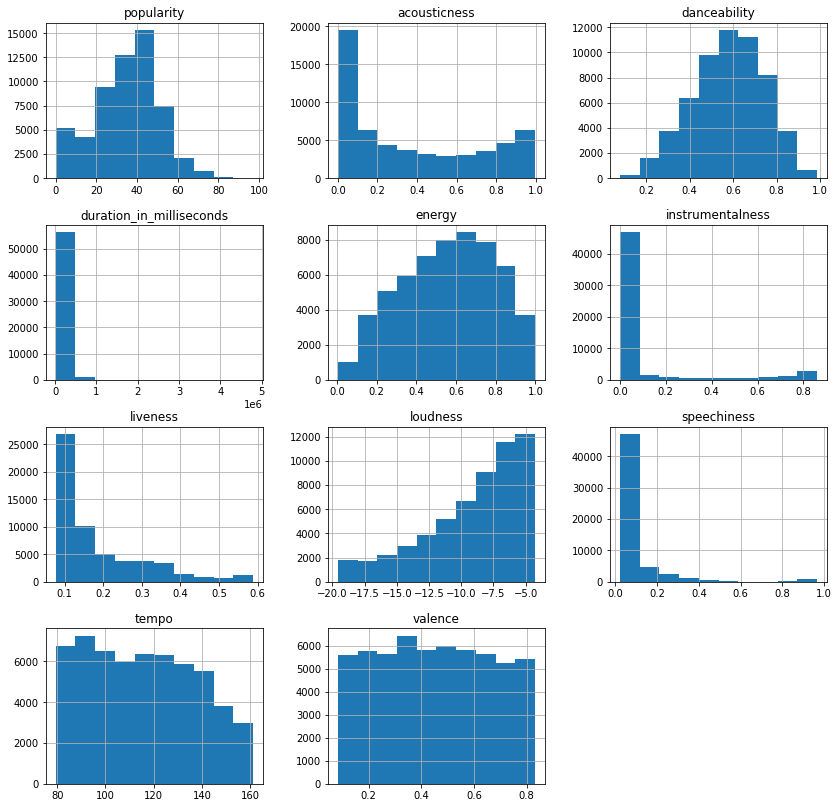

In [29]:
spotifyData.hist(figsize=(14,14))

##2. Histogram for Genre using original data

array([[<AxesSubplot:title={'center':'A Capella'}>,
        <AxesSubplot:title={'center':'Alternative'}>,
        <AxesSubplot:title={'center':'Anime'}>,
        <AxesSubplot:title={'center':'Blues'}>,
        <AxesSubplot:title={'center':"Children's Music"}>],
       [<AxesSubplot:title={'center':'Children’s Music'}>,
        <AxesSubplot:title={'center':'Classical'}>,
        <AxesSubplot:title={'center':'Comedy'}>,
        <AxesSubplot:title={'center':'Country'}>,
        <AxesSubplot:title={'center':'Dance'}>],
       [<AxesSubplot:title={'center':'Electronic'}>,
        <AxesSubplot:title={'center':'Folk'}>,
        <AxesSubplot:title={'center':'Hip-Hop'}>,
        <AxesSubplot:title={'center':'Indie'}>,
        <AxesSubplot:title={'center':'Jazz'}>],
       [<AxesSubplot:title={'center':'Movie'}>,
        <AxesSubplot:title={'center':'Opera'}>,
        <AxesSubplot:title={'center':'Pop'}>,
        <AxesSubplot:title={'center':'R&B'}>,
        <AxesSubplot:title={'center':'Rap'}>]

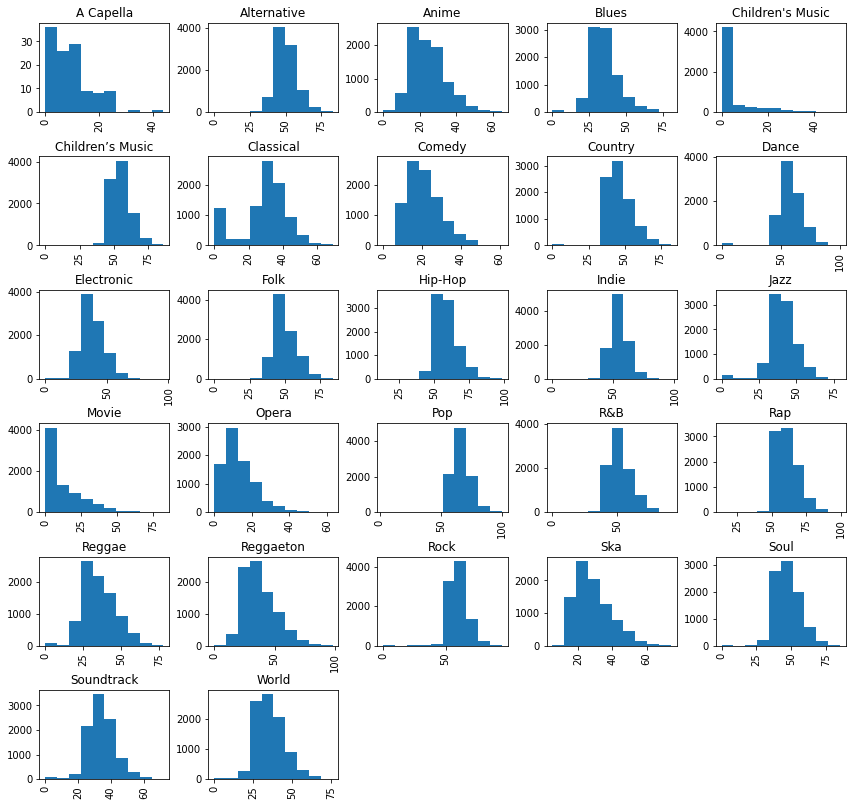

In [30]:
originalData.hist(column="popularity",by="genre",figsize=(14,14))

##3. Histogram for Category columns

array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'A#'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'C#'}>,
        <AxesSubplot:title={'center':'D'}>],
       [<AxesSubplot:title={'center':'D#'}>,
        <AxesSubplot:title={'center':'E'}>,
        <AxesSubplot:title={'center':'F'}>],
       [<AxesSubplot:title={'center':'F#'}>,
        <AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'G#'}>]], dtype=object)

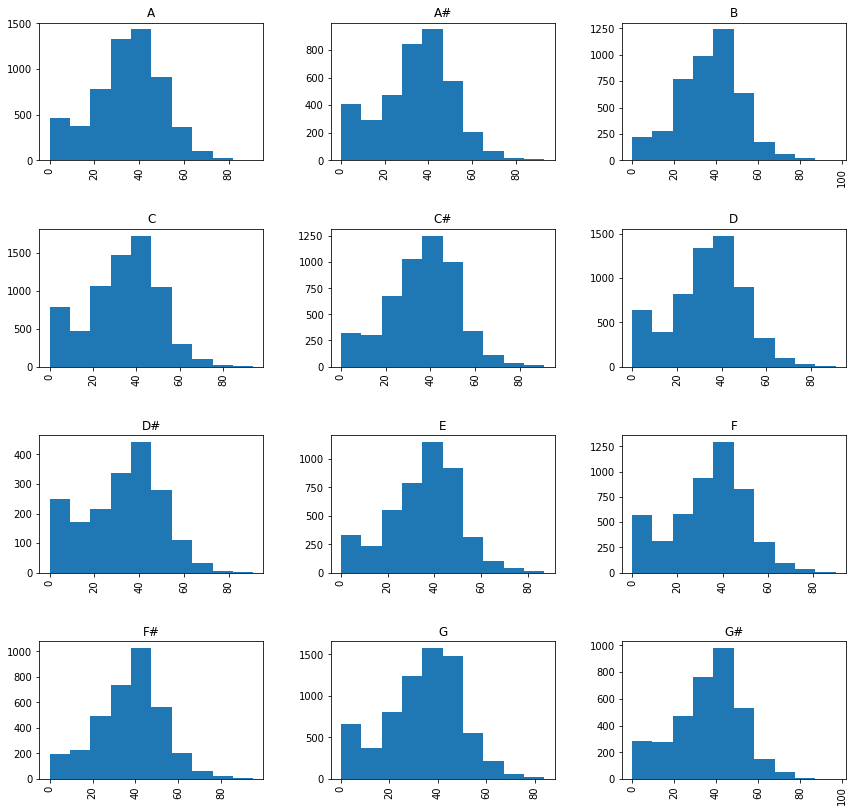

In [31]:
spotifyData.hist(column="popularity",by="key",figsize=(14,14))

array([[<AxesSubplot:title={'center':'0/4'}>,
        <AxesSubplot:title={'center':'1/4'}>],
       [<AxesSubplot:title={'center':'3/4'}>,
        <AxesSubplot:title={'center':'4/4'}>],
       [<AxesSubplot:title={'center':'5/4'}>, <AxesSubplot:>]],
      dtype=object)

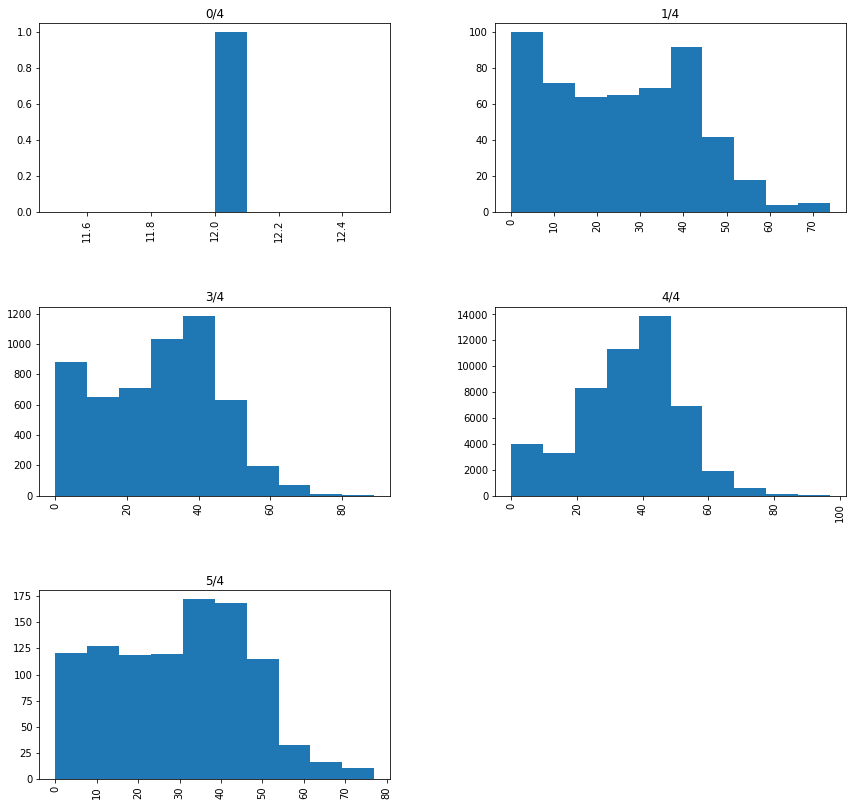

In [32]:
spotifyData.hist(column="popularity",by="time_signature",figsize=(14,14))

##4.Cross Correlation Matrix

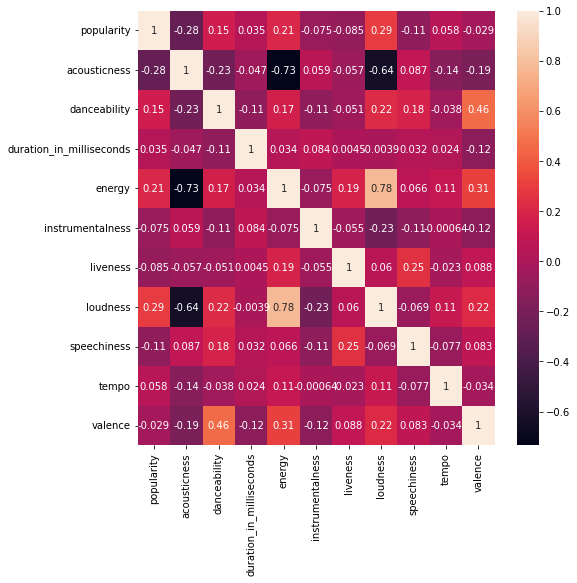

In [33]:
corr_matrix = spotifyData.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

##5. Analysis of artist with most songs

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'duration_in_milliseconds'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>, <AxesSubplot:>]],
      dtype=object)

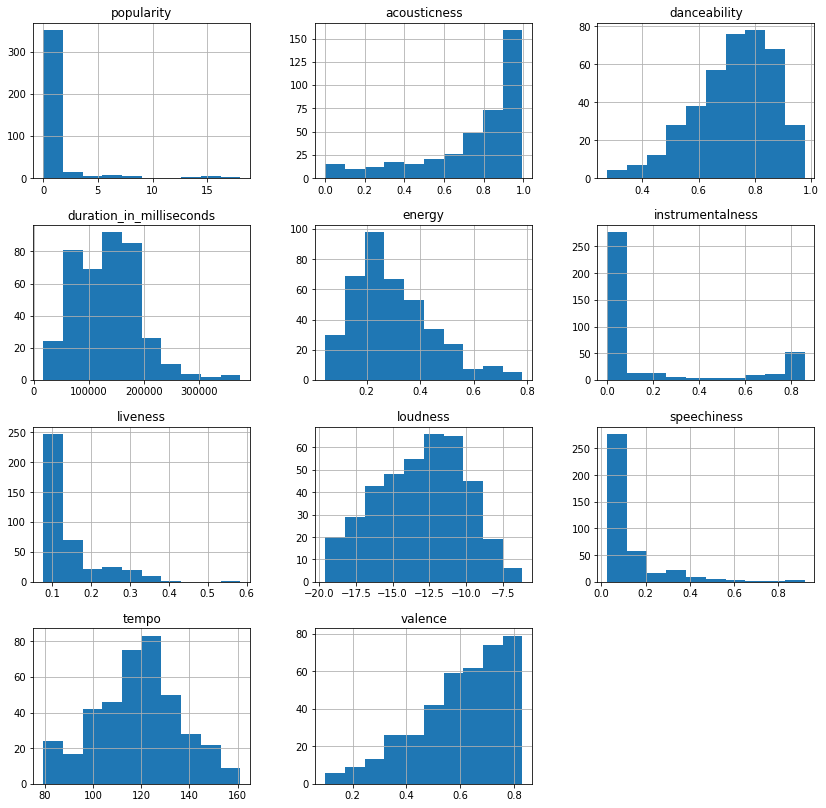

In [34]:
Max_artist=spotifyData["artist_name"].value_counts().idxmax()
spotifyData[spotifyData["artist_name"]==Max_artist].hist(figsize=(14,14))

##6. Analysis of Artist who's mean popularity is highest

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'duration_in_milliseconds'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>, <AxesSubplot:>]],
      dtype=object)

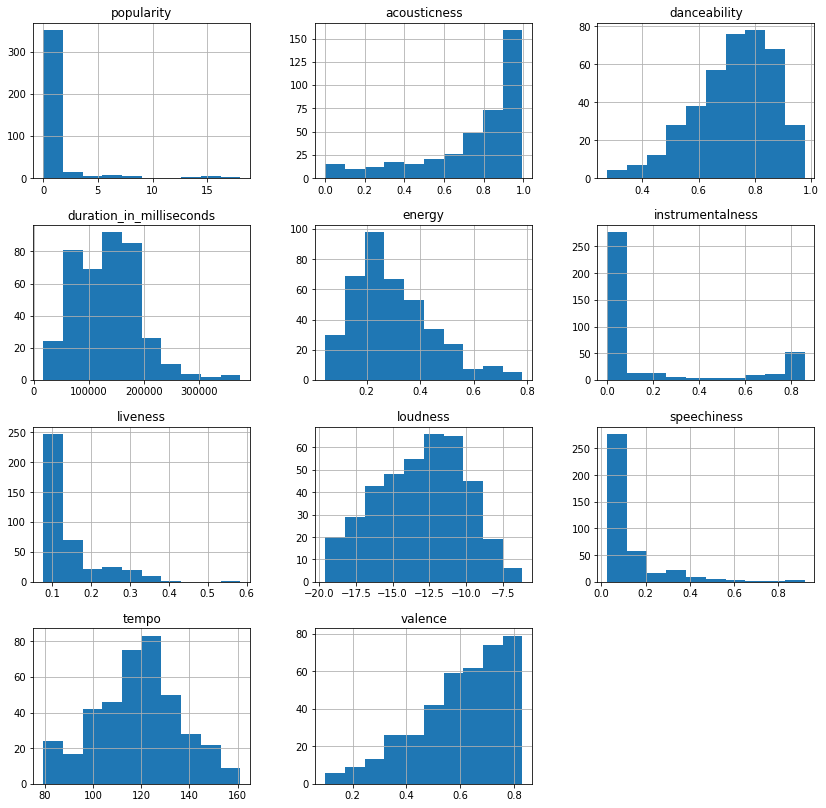

In [35]:
popular_artist=spotifyData.groupby('artist_name')['popularity'].mean().idxmax()
spotifyData[spotifyData["artist_name"]==Max_artist].hist(figsize=(14,14))

##7. Analysis of most popular tracks

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'duration_in_milliseconds'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>],
       [<AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'speechiness'}>],
       [<AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>, <AxesSubplot:>]],
      dtype=object)

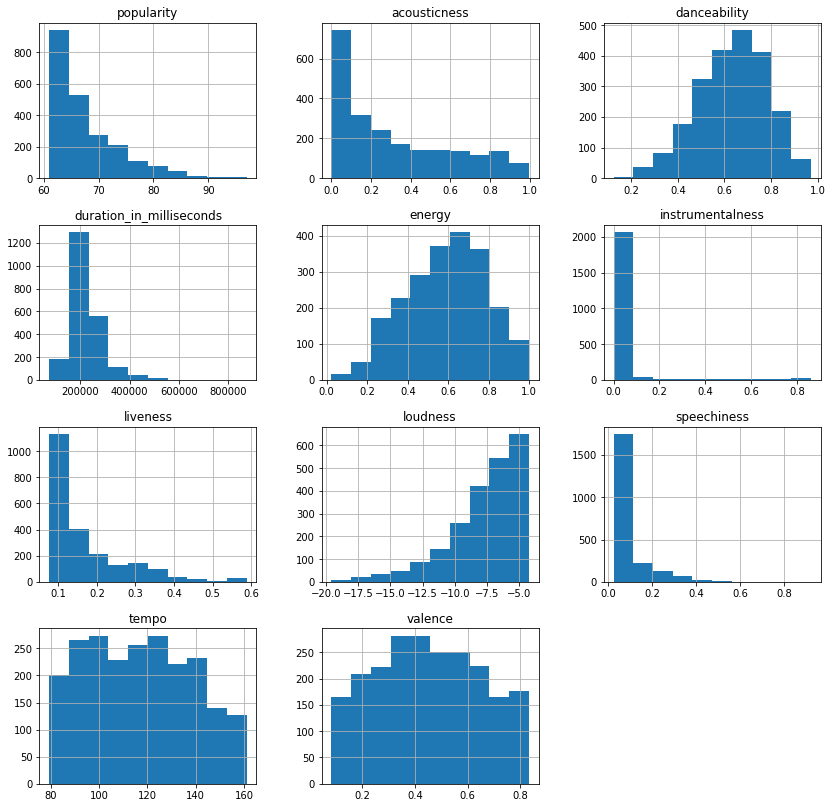

In [36]:
spotifyData[spotifyData["popularity"]>60].hist(figsize=(14,14))

##8. Scatter plot of few features with respect to popularity

<AxesSubplot:xlabel='loudness', ylabel='popularity'>

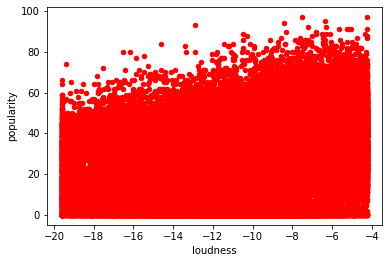

In [37]:
#Loudness vs popularity
spotifyData.plot.scatter(x="loudness",y="popularity", color = "r")

<AxesSubplot:xlabel='liveness', ylabel='popularity'>

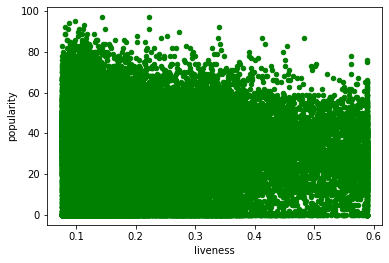

In [38]:
#liveness vs popularity
spotifyData.plot.scatter(x="liveness",y="popularity", color = "g")

<AxesSubplot:xlabel='danceability', ylabel='popularity'>

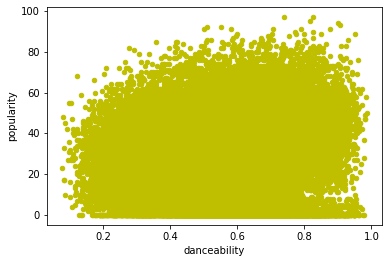

In [39]:
#danceability vs popularity
spotifyData.plot.scatter(x="danceability",y="popularity", color = "y")

##9. Bar Graph of 5 most Popular Songs vs Duration in milliseconds 

[Text(0.5, 1.0, '5 most duration songs')]

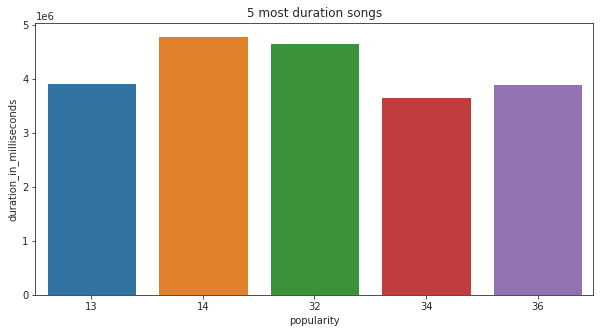

In [40]:
sns.set_style(style = 'ticks')
plt.figure(figsize = (10,5))
top = spotifyData.sort_values('duration_in_milliseconds', ascending = False).head(5)
sns.barplot(y = 'duration_in_milliseconds', x = 'popularity', data = top).set(title = '5 most duration songs')

##10. Different types of genres and their percentages

In [41]:
fig = px.pie(originalData['genre'].value_counts().reset_index(), values='genre', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

##11. Popularity vs Energy boxplot.



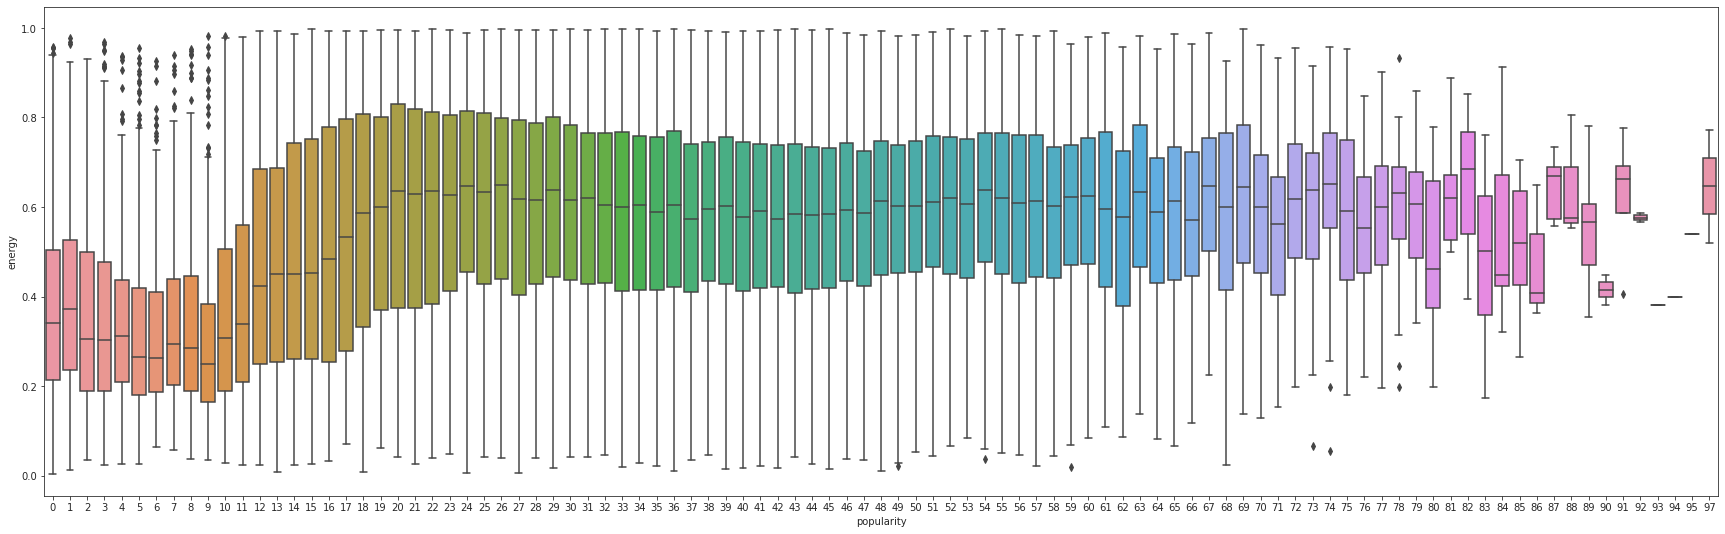

In [42]:
sns.set_style(style = 'ticks')
plt.figure(figsize = (30,9))
top = spotifyData.sort_values('popularity', ascending = False)
sns.boxplot(x = 'popularity',y = 'energy', data = top);

##12. Popularity Vs Tempo

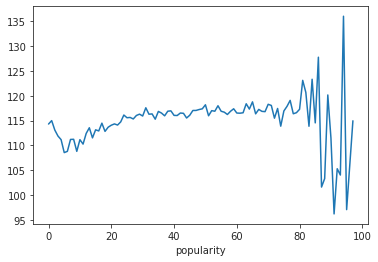

In [43]:
spotifyData.groupby('popularity')['tempo'].mean().plot();

##13. Popularity vs Instrumentalness 

<AxesSubplot:xlabel='popularity', ylabel='instrumentalness'>

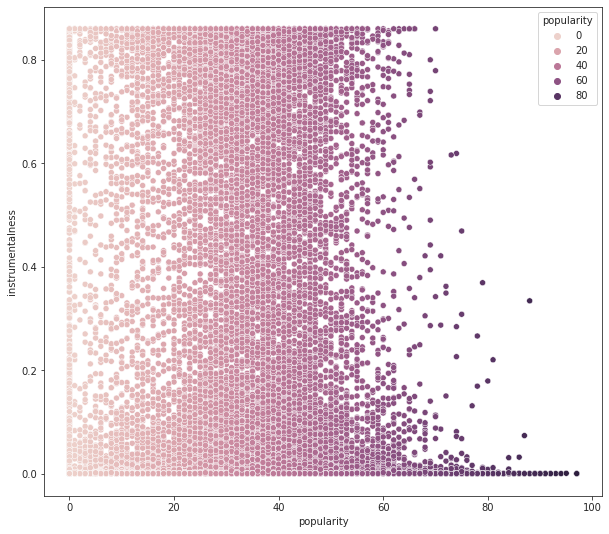

In [44]:
sns.set_style(style = 'ticks')
plt.figure(figsize = (10,9))
sns.scatterplot(x = 'popularity',y = 'instrumentalness',hue = 'popularity', data = spotifyData)